In [3]:
from sklearn.datasets import load_iris

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

### SIMPLE LINEAR SVM TO FIND IF THE PLANT IS IRIS VIRGINICA

In [33]:
iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

svm_model = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state = 42))
svm_model.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [34]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [35]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_model.predict(X_new)

array([ True, False])

In [36]:
svm_model.decision_function(X_new)

array([ 0.66163816, -0.22035761])

In [37]:
import numpy as np
import matplotlib.pyplot as plt

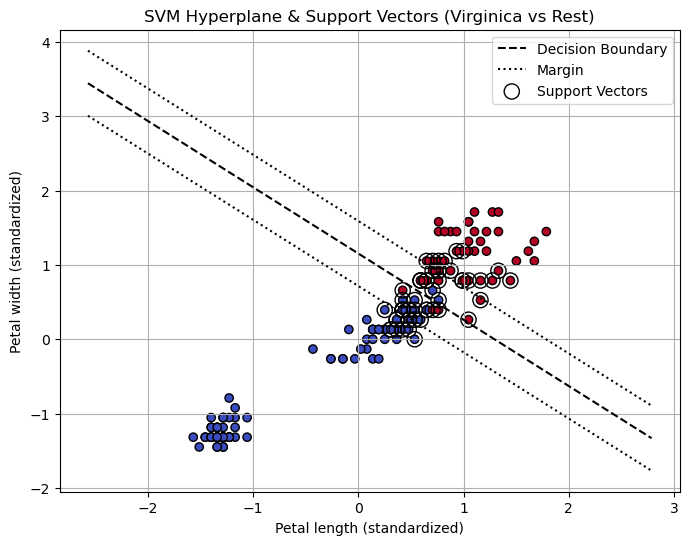

In [47]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use SVC with linear kernel (gives access to support vectors)
svc = SVC(kernel="linear", C=0.1)
svc.fit(X_scaled, y)

# Create grid to plot decision boundary
x0 = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 300)
x1 = -(w[0] * x0 + b) / w[1]                 # Decision boundary
margin = 1 / np.linalg.norm(w)               # Distance from boundary to margin
x1_margin_up = x1 + margin                   # Positive margin
x1_margin_down = x1 - margin                 # Negative margin

# Plot everything
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="coolwarm", edgecolors='k')
plt.plot(x0, x1, "k--", label="Decision Boundary")
plt.plot(x0, x1_margin_up, "k:", label="Margin")
plt.plot(x0, x1_margin_down, "k:")

# Plot support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            s=120, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.title("SVM Hyperplane & Support Vectors (Virginica vs Rest)")
plt.legend()
plt.grid(True)
plt.show()

### Implementing Non Linear SVM using toy dataset make_moons

In [20]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

polynomial_svm_model = make_pipeline(PolynomialFeatures(degree = 3), StandardScaler(), LinearSVC(C=10, max_iter = 10_000, random_state = 42))

polynomial_svm_model.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [22]:
import matplotlib.pyplot as plt
import numpy as np

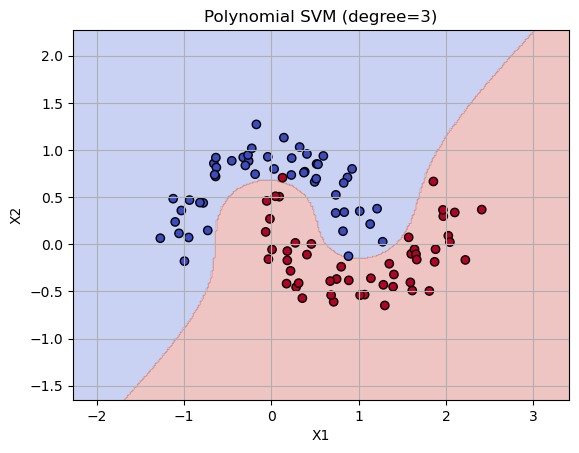

In [29]:
def plot_boundary(polynomial_svm_model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    X_new = np.c_[xx.ravel(), yy.ravel()]
    preds = polynomial_svm_model.predict(X_new).reshape(xx.shape)

    plt.contourf(xx, yy, preds, cmap="coolwarm", alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors='k')
    plt.title("Polynomial SVM (degree=3)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

plot_boundary(polynomial_svm_model, X, y)

### IMPLEMENTING SVC (Kernel = Polynomial)
#### Continuing the moon sample

In [53]:
from sklearn.svm import SVC

poly_kernel_svc = make_pipeline(StandardScaler(), SVC(kernel = 'poly', degree = 3, coef0 = 0.1, C=5))
poly_kernel_svc.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=0.1, kernel='poly'))])